In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [3]:
df.shape

(489, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


In [5]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


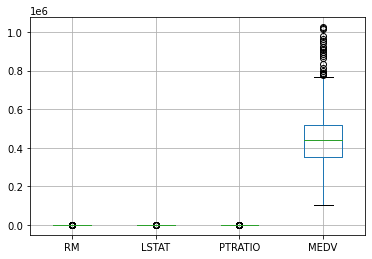

In [6]:
df.boxplot()

In [7]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

RM              0.695
LSTAT           9.750
PTRATIO         2.800
MEDV       168000.000
dtype: float64

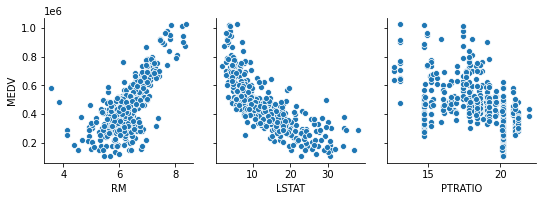

In [8]:
sns.pairplot(x_vars=["RM","LSTAT","PTRATIO"],y_vars=["MEDV"],data=df)

In [9]:
# Here is curvilinear data so we used polynomial regression

In [10]:
new_df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
new_df


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


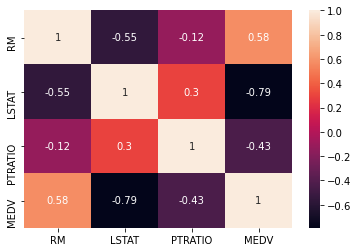

In [11]:
sns.heatmap(new_df.corr(),annot=True)

In [12]:
x=new_df.drop("MEDV",axis=1)
y=new_df["MEDV"]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [15]:
ypred=model.predict(xtest)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
mae=mean_absolute_error(ytest,ypred)
print("mean_absolute_error:-",mae)
mse=mean_squared_error(ytest,ypred)
print("mean_squared_error:-",mse)
rscore=r2_score(ytest,ypred)
print("r2_score:-",rscore)
rmse=np.sqrt(mse)
print("Root mean_squared_error:-",rmse)

mean_absolute_error:- 55143.591272247075
mean_squared_error:- 4737478600.032286
r2_score:- 0.6883132514831242
Root mean_squared_error:- 68829.34403313957


In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly_reg=PolynomialFeatures(degree=2)

In [20]:
x_poly=poly_reg.fit_transform(x)

In [21]:
pl_reg=LinearRegression()

In [22]:
pl_reg.fit(x_poly,y)

LinearRegression()

In [23]:
pl_reg.score(x_poly,y)

0.7664923815735436